In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
train = pd.read_csv("../input/train.csv")
train.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The first step is to make data cleansing. Check for the null values and clean the data.

In [43]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that, there are two colums which has null values. Cabin is a column where in we don't require for data visualization, so it's betterto drop the column."

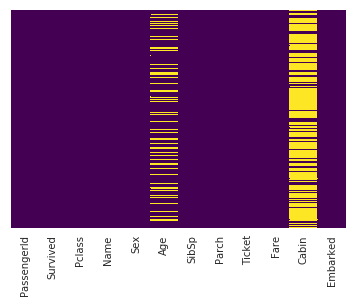

In [44]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');


In [45]:
train.drop('Cabin',axis=1,inplace=True)
train['Age'].fillna((train['Age'].median()), inplace=True)


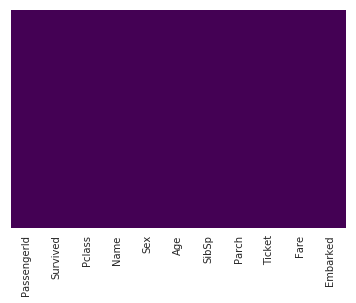

In [46]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');


Now the data is clean without NaN values, lets do some visualization and try to find the insights.

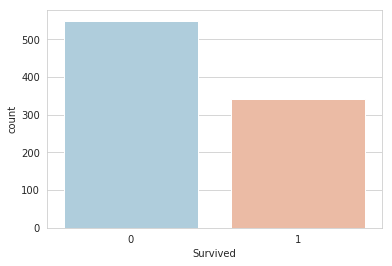

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r');

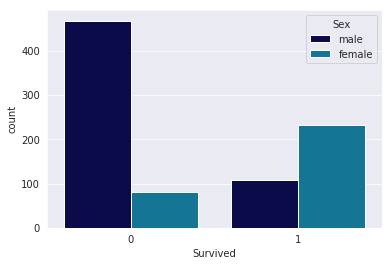

In [48]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='ocean');

From the above graph, it stats that the most of the males are not survided.

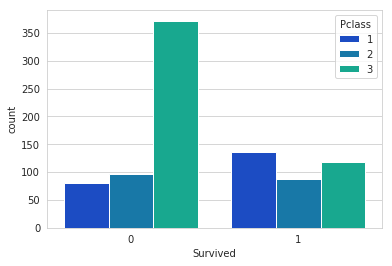

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='winter');

This graph clearly indicaes that the 3rd class passengers are not surivided much.

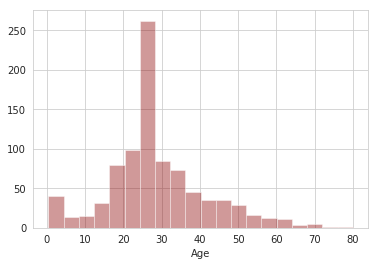

In [50]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=20);

We can observe that most of the passengers are in the age group of 20 to 35.

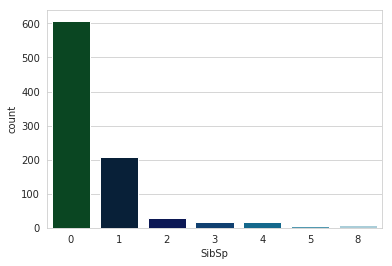

In [51]:
sns.countplot(x='SibSp',data=train,palette='ocean');

SibSp stands for number of siblings and spouse travelled along with the passenger. Most of the passengers are travelled in single without siblings and spouse along with them.

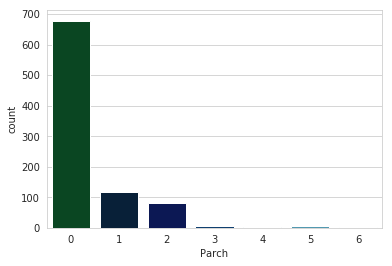

In [52]:
sns.countplot(x='Parch',data=train,palette='ocean');

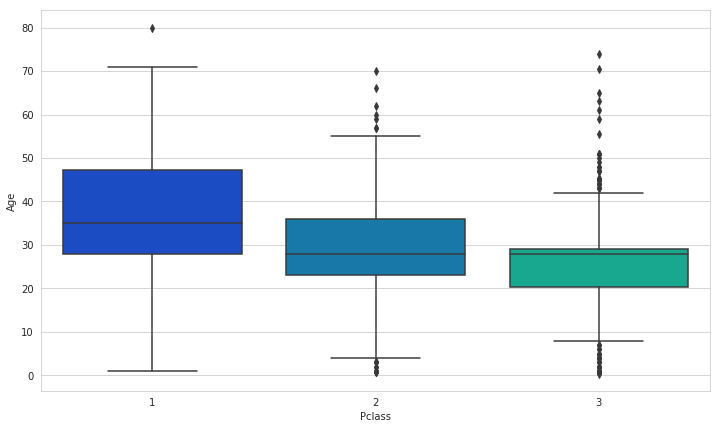

In [53]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter');

Parch stands for number of Parent-children combination travelled along with the passenger. Even we see that the count is less. now let's look at the data and check for the textual colums and convert them to numerical in order to design a model.

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


Now drop unnecessary columns.
The dataset has PassengerId,Name and Ticket which are really not required. Hence drop the columns. Convert the sex and Embarked columns to numerical respectively.

In [55]:
# create the dummy variables and drop one column as there is no need of 2 columns in order to differentiate the values.
sex = pd.get_dummies(train['Sex'],drop_first=True)
# similarly for this colimn as well. If there are n dummy columns, consider n-1
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [56]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [57]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now the data is ready! let's build the model.

### Train Test Split


In [58]:
from sklearn.model_selection import train_test_split
X = train.drop("Survived",axis=1)
y = train['Survived']
#X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.20,random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=5)

Let us train the data and predict the scores using logistic regression

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
# create an instance
logmodel = LogisticRegression()
# pass the values and build the model
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
# preditcing the test models
predictions = logmodel.predict(X_test)

 ## Evaluation :  Logistic Regression

Let's evaluate using confusion  matrix and F1 score

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))

[[102   9]
 [ 20  48]]


In [62]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       111
           1       0.84      0.71      0.77        68

   micro avg       0.84      0.84      0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [63]:
print(accuracy_score(y_test,predictions)*100)

83.79888268156425


## Evaluation : Decision Tree Classifiction


In [64]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test,dt_pred))


[[85 26]
 [20 48]]


In [65]:
print(classification_report(y_test,dt_pred))


              precision    recall  f1-score   support

           0       0.81      0.77      0.79       111
           1       0.65      0.71      0.68        68

   micro avg       0.74      0.74      0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.74      0.74       179



In [66]:
print(accuracy_score(y_test,dt_pred)*100)

74.30167597765363


The accuracy score is comparitively less to the logistic regression and it is still the best model as of now, let us try another model.

## Random Forest Classification


In [67]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rf_pre=rf.predict(X_test)
print(confusion_matrix(y_test,rf_pre))


[[100  11]
 [ 19  49]]


In [69]:
print(classification_report(y_test,rf_pre))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       111
           1       0.82      0.72      0.77        68

   micro avg       0.83      0.83      0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [70]:
print(accuracy_score(y_test,rf_pre)*100)

83.24022346368714


Random forest and logistic regressions are almost equal in predictions, you can use either of them for the model.

Finally, the model is complete. Now let's take a random data and check the survival rate of the passegers.

In [71]:
test = pd.read_csv("../input/test.csv")
test.head(5) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Observe that there is no " survived " column in the dataset, which has to be predicted now.

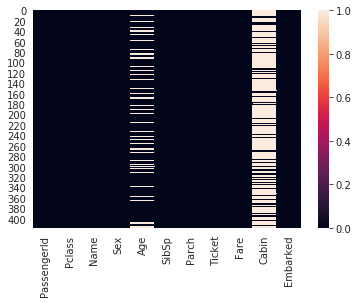

In [72]:
sns.heatmap(test.isnull());

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are missing values just like the train data which we performed before, perform the same steps and clean the data.

In [74]:
test.drop('Cabin',axis=1,inplace=True)
test['Age'].fillna((test['Age'].median()), inplace=True)
test['Fare'].fillna((test['Fare'].median()), inplace=True)
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test = pd.concat([test,sex_test,embark_test],axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


Now apply any one of the regression technique and check for the results.

In [75]:
prediction = logmodel.predict(test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

The prediction values are stored in numpy array, in order to add this column to the test dataset, convert to dataframe.

In [76]:
test_pred = pd.DataFrame(prediction, columns= ['Survived'])

In [77]:
Survived_dataset = pd.concat([test, test_pred], axis=1, join='inner')

In [78]:
Survived_dataset.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1


In [83]:
dataset = Survived_dataset[['PassengerId','Survived']]
dataset.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


From the above dataset, we have successfully predicted the passengers who are survived Vs not survived.

In [84]:
data_to_submit = pd.DataFrame(Survived_dataset[['PassengerId','Survived']])

In [85]:
data_to_submit.to_csv('csv_to_submit.csv', index = False)
